# Домашнее задание к лекции "Базовые понятия статистики"

## Обязательная часть

Будем осуществлять работу с непростым [набором данных](https://raw.githubusercontent.com/obulygin/pyda_homeworks/master/statistics_basics/horse_data.csv) о состоянии здоровья лошадей, испытывающих кишечные колики. 

### Задание 1. Базовое изучение

Изучить представленный набор данных на основе [описания его столбцов](https://raw.githubusercontent.com/obulygin/pyda_homeworks/master/statistics_basics/horse_data.names) и выбрать 8 столбцов для дальнейшего изучения (среди них должны быть как числовые, так и категориальные). Провести расчет базовых метрик для них, кратко описать результаты.

### Задание 2. Работа с выбросами

В выбранных числовых столбцах найти выбросы, выдвинуть гипотезы об их причинах и проинтерпретировать результаты. Принять и обосновать решение о дальнейшей работе с ними.

### Задание 3. Работа с пропусками

Рассчитать количество выбросов для всех выбранных столбцов. Принять и обосновать решение о методе работы с пропусками по каждому столбцу, сформировать датафрейм, в котором пропуски будут отсутствовать.

In [236]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [354]:
df1 = pd.read_csv('horse_data.csv')
df.head(3)

,операция,Возраст,Номер больницы,ректальная температура,пульс,вздутие живота,общий белок,результат
0,2,1,530101,38.5,66,4,8.40,2
1,1,1,534817,39.2,88,2,85,3
2,2,1,530334,38.3,40,1,6.70,1


Создадим колонки (названия)

In [372]:
df_new = pd.read_csv('horse_data.csv', names=['операция','Возраст','Номер больницы','ректальная температура','пульс',
                                         'частота дыхания','температура конечностей','периферический пульс',
                                         'слизистые оболочки','время наполнения капилляров','боль','перистальтика',
                                         'вздутие живота','назогастральный зонд','назогастральный рефлюкс',
                                         'назогастральный рефлюкс, PH','ректальное исследование - кал','живот',
                                         'объем упакованной ячейки','общий белок','внешний вид брюшной полости',
                                         'общий белок брюшной полости','результат','хирургическое поражение',
                                         'тип поражения1','тип поражения2','тип поражения3','cp_data'])
df_new.head(3)

,операция,Возраст,Номер больницы,ректальная температура,пульс,частота дыхания,температура конечностей,периферический пульс,слизистые оболочки,время наполнения капилляров,...,объем упакованной ячейки,общий белок,внешний вид брюшной полости,общий белок брюшной полости,результат,хирургическое поражение,тип поражения1,тип поражения2,тип поражения3,cp_data
0,2,1,530101,38.50,66,28,3,3,?,2,...,45.00,8.40,?,?,2,2,11300,0,0,2
1,1,1,534817,39.2,88,20,?,?,4,1,...,50,85,2,2,3,2,2208,0,0,2
2,2,1,530334,38.30,40,24,1,1,3,1,...,33.00,6.70,?,?,1,2,0,0,0,1


Выберим для анализа 8 столбцов

In [373]:
df=df_new.filter(items = ['операция','Возраст','Номер больницы','ректальная температура','пульс','вздутие живота',
                      'общий белок','результат'])                                       
df.head()

,операция,Возраст,Номер больницы,ректальная температура,пульс,вздутие живота,общий белок,результат
0,2,1,530101,38.50,66,4,8.40,2
1,1,1,534817,39.2,88,2,85,3
2,2,1,530334,38.30,40,1,6.70,1
3,1,9,5290409,39.10,164,4,7.20,2
4,2,1,530255,37.30,104,?,7.40,2


Для выбора метода замены неизвестных (неопределенных) значений либо методом удаления строк/столбцов
или замены на другое значение (0, среднее, близлежащее)
проверяем как часто и в какой последовательности в датафрейме встречается значение "?"

In [277]:
df.loc[df['операция']=='?']

,операция,Возраст,Номер больницы,ректальная температура,пульс,вздутие живота,общий белок,результат
132,?,1,534572,38.0,48,1,73,?


In [312]:
len(df.loc[df['ректальная температура']=='?'])

60

In [279]:
len(df.loc[df['пульс']=='?'])

24

Вывод: не удаляем, производим замену значения "?" на моду,медиану или среднее значения в зависимости от столбца

In [313]:
df.info()    # посмотрим тип записанных данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   операция                300 non-null    object
 1   Возраст                 300 non-null    int64 
 2   Номер больницы          300 non-null    int64 
 3   ректальная температура  300 non-null    object
 4   пульс                   300 non-null    object
 5   вздутие живота          300 non-null    object
 6   общий белок             300 non-null    object
 7   результат               300 non-null    object
dtypes: int64(2), object(6)
memory usage: 18.9+ KB


Преобразуем столбцы с типом object в числовые значения

In [281]:
df['операция'].unique()     # смотрим записанные значения, выявляем не валидные

array(['2', '1', '?'], dtype=object)

In [282]:
print(len(df.loc[df['операция']=='1']))
print(len(df.loc[df['операция']=='2']))
print(len(df.loc[df['операция']=='?']))  # '?' после замены, например на 0, будет является выбросом, 
                                         # заменим его на моду

180
119
1


In [283]:
df['операция'].replace(['?'],[1],inplace=True)  # заменяем не корректные значение на 1 (мода),
                                                # как наиболее встречающееся значение при условии того что  
                                                #значение "?" встречается 1 раз
df['операция'].unique()                         # проверяем

array(['2', '1', 1], dtype=object)

In [284]:
df['операция']=pd.to_numeric(df['операция'])  # преобразовываем значения в числовой тип
df['операция'].unique()                       # проверяем

array([2, 1])

In [285]:
print('мода: ',df['операция'].round().mode()[0]) #  проверяем значение 1=мода
print('медиана: ',df['операция'].median())
print('среднее: ',df['операция'].mean())
print('СКО: ',df['операция'].std())
print('Дисперсия: ',df['операция'].var())
print('максимум: ',df['операция'].max())
print('минимум: ',df['операция'].min())
print('размах: ',df['операция'].max()-df['операция'].min())  
print('квантили: ',df['операция'].quantile())
print('межквартильный размах: ',df['операция'].quantile(0.75)-df['операция'].quantile(0.25))
print('1-ый и 3-ий квантили: ',df['операция'].quantile([0.25,0.75]))

мода:  1
медиана:  1.0
среднее:  1.3966666666666667
СКО:  0.49002309230504354
Дисперсия:  0.24012263099219724
максимум:  2
минимум:  1
размах:  1
квантили:  1.0
межквартильный размах:  1.0
1-ый и 3-ий квантили:  0.25    1.0
0.75    2.0
Name: операция, dtype: float64


аналогично проверяем и преобразовываем по другим столбцам с типом данных object

In [330]:
len(df.loc[df['ректальная температура']=='?'])

60

In [331]:
df['ректальная температура'].replace(['?'],[0],inplace=True)     
df['ректальная температура'].unique()

array(['38.50', '39.2', '38.30', '39.10', '37.30', 0, '37.90', '38.10',
       '37.20', '38.00', '38.2', '37.60', '37.50', '39.4', '39.90',
       '38.40', '38.60', '38.3', '38.1', '37.80', '37.7', '37.70',
       '38.20', '37.8', '39.20', '39.00', '35.4', '38.90', '37.40',
       '40.30', '37.9', '37.00', '39.7', '37.6', '38.7', '36.40', '37.3',
       '38.0', '38.80', '39.60', '36.80', '38.4', '39.50', '36.5',
       '39.40', '38.70', '37.4', '38', '36.00', '37.1', '38.9', '39.30',
       '38.8', '39.5', '37.5', '38.5', '37.10', '36.10', '39.3', '36.60',
       '40.80', '36.90', '38.6', '40.00', '36.50', '37.2'], dtype=object)

значение "0" является выбросом, таких значений в столбце 60 и они (значение 0) сильно отличаються от всей совокупности данных
Вывод: данные выбросы удалять нельзя - это повлияет на все данные датасета, надо заменить

In [332]:
df['ректальная температура']=pd.to_numeric(df['ректальная температура'])
#df['ректальная температура'].unique()

In [333]:
# определяем выбросы через межквартильный размах
q_temp1 = df['ректальная температура'].quantile(0.25)
q_temp3 = df['ректальная температура'].quantile(0.75)
iqr_temp = q_temp3 - q_temp1
lower_bound_temp = q_temp1 - (1.5 * iqr_temp) 
upper_bound_temp = q_temp3 + (1.5 * iqr_temp)
remove_outliers_temp = df[~df['ректальная температура'].between(lower_bound_temp, upper_bound_temp, inclusive=True)]
remove_outliers_temp

,операция,Возраст,Номер больницы,ректальная температура,пульс,вздутие живота,общий белок,результат
5,2,1,528355,0.0,?,2,?,1
7,1,1,529607,0.0,60,2,8.30,2
8,2,1,530051,0.0,80,4,6.20,3
16,1,9,5301219,0.0,128,3,7.80,2
28,1,1,5279442,0.0,?,?,?,2
...,...,...,...,...,...,...,...,...
274,1,1,534624,0.0,76,4,?,3
282,1,1,527544,0.0,70,2,7.50,2
288,1,1,529428,0.0,?,?,?,1
293,1,1,534004,0.0,78,?,62,3


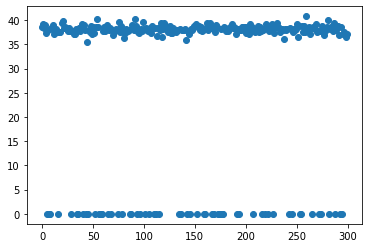

In [334]:
# рисуем точечный график, чтоб посмотреть наличие зависимостей и выбросов, а так же корректность выводов 
# по результатам проведенных рассчетов статистик 

plt.scatter(x=range(len(df['ректальная температура'])),y=df['ректальная температура'])

In [335]:
df['ректальная температура'].mean()    # вычисляем среднее для замены "?" 

30.534333333333354

смотрим как изменилось среднее значение после замены 0 на среднее (с 0-ем) 30.53433333
                                       # Вывод: Замена не подходит. значение 30.534 так же остается выбросами (проверял через межквартильный размах) и среднее изменилось на 17% в сторону увеличения. 
                                       # применить метод Заполнения медианой

In [336]:
df['ректальная температура'].median()   # вычисляем медиану для замены'?''

38.0

In [342]:
df['ректальная температура'].replace([0],[38],inplace=True)     
df['ректальная температура'].unique()

array([38.5, 39.2, 38.3, 39.1, 37.3, 38. , 37.9, 38.1, 37.2, 38.2, 37.6,
       37.5, 39.4, 39.9, 38.4, 38.6, 37.8, 37.7, 39. , 35.4, 38.9, 37.4,
       40.3, 37. , 39.7, 38.7, 36.4, 38.8, 39.6, 36.8, 39.5, 36.5, 36. ,
       37.1, 39.3, 36.1, 36.6, 40.8, 36.9, 40. ])

In [343]:
# определяем выбросы через межквартильный размах
q_temp1 = df['ректальная температура'].quantile(0.25)
q_temp3 = df['ректальная температура'].quantile(0.75)
iqr_temp = q_temp3 - q_temp1
lower_bound_temp = q_temp1 - (1.5 * iqr_temp) 
upper_bound_temp = q_temp3 + (1.5 * iqr_temp)
remove_outliers_temp = df[~df['ректальная температура'].between(lower_bound_temp, upper_bound_temp, inclusive=True)]
remove_outliers_temp

# данные в полученных выбросах валидны. далее работать путем выделения выбросов в отдельную группу и прводить аналииз
# группы данных без выбросов и группы куда вошли выбросы

,операция,Возраст,Номер больницы,ректальная температура,пульс,вздутие живота,общий белок,результат
20,1,1,530157,39.9,72,4,6.10,1
44,1,1,535407,35.4,140,?,69,3
54,2,1,529461,40.3,114,3,8.10,3
75,1,9,534092,39.7,100,?,57,3
80,1,1,527518,36.4,98,2,6.40,2
91,2,1,529461,40.3,114,3,8.10,2
99,2,1,530002,39.6,108,3,8.00,1
113,1,1,527933,36.8,60,?,?,2
117,2,1,5290482,39.5,?,3,6.70,3
118,1,1,533983,36.5,78,1,75,1


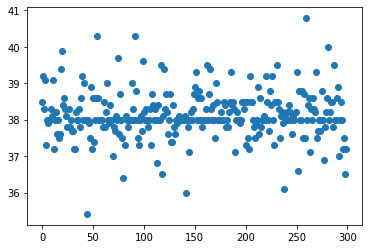

In [344]:
# смотрим как изменился график после замены на медиану. видим корректное отображение данных исходя 
# из описания датасета (линейный, Повышенная температура может возникнуть из-за инфекции, возможно снижение
# температуры при позднем шоке, нормальная температура 37,8)
plt.scatter(x=range(len(df['ректальная температура'])),y=df['ректальная температура'])

In [345]:
print('мода: ',df['ректальная температура'].round().mode()[0]) #  проверяем значение 1=мода
print('медиана: ',df['ректальная температура'].median())
print('среднее: ',df['ректальная температура'].mean())
print('СКО: ',df['ректальная температура'].std())
print('Дисперсия: ',df['ректальная температура'].var())
print('максимум: ',df['ректальная температура'].max())
print('минимум: ',df['ректальная температура'].min())
print('размах: ',df['ректальная температура'].max()-df['ректальная температура'].min())  
print('квантили: ',df['ректальная температура'].quantile())
print('межквартильный размах: ',df['ректальная температура'].quantile(0.75)-df['ректальная температура'].quantile(0.25))
print('1-ый и 3-ий квантили: ',df['ректальная температура'].quantile([0.25,0.75]))

мода:  38.0
медиана:  38.0
среднее:  38.134333333333345
СКО:  0.6581527982988336
Дисперсия:  0.43316510590858504
максимум:  40.8
минимум:  35.4
размах:  5.399999999999999
квантили:  38.0
межквартильный размах:  0.6000000000000014
1-ый и 3-ий квантили:  0.25    37.9
0.75    38.5
Name: ректальная температура, dtype: float64


In [295]:
len(df.loc[df['пульс']=='?']) # выбросы

24

In [296]:
df['пульс'].replace(['?'],[0],inplace=True)
df['пульс'].unique()        

array(['66', '88', '40', '164', '104', 0, '48', '60', '80', '90', '72',
       '42', '92', '76', '96', '128', '64', '110', '130', '108', '100',
       '112', '52', '146', '150', '120', '140', '84', '46', '114', '160',
       '54', '56', '38', '98', '50', '44', '70', '78', '49', '30', '136',
       '132', '65', '86', '129', '68', '36', '45', '124', '184', '75',
       '82'], dtype=object)

In [297]:
df['пульс']=pd.to_numeric(df['пульс'])  
 

смотрим наличие выбросов, кроме уже определенного значения "0" (после замены пропущенных значений "?"

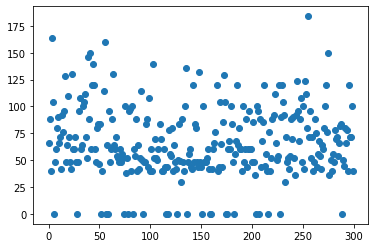

In [298]:
# рисуем точечный график, чтоб посмотреть наличие зависимостей и выбросов, а так же корректность выводов 
# по результатам проведенных рассчетов статистик 

plt.scatter(x=range(len(df['пульс'])),y=df['пульс'])


In [304]:
# определяем выбросы через межквартильный размах
q1 = df['пульс'].quantile(0.25)
q3 = df['пульс'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr) 
upper_bound = q3 + (1.5 * iqr)
remove_outliers = df[~df['пульс'].between(lower_bound, upper_bound, inclusive=True)]
remove_outliers

#Вывод: 5 значений по параметру "пульс" являются валидными. Пульс выше средних значений был у лошадей, 
# перенесших операцию, старых и в результате умерших, лошадь без опреации (41) осталась жива
# Решение - оставить в датасете как валидные, далее можно разбить датасет на 2 группы - ввделив выбросы в отдельную,
# и проводить исследвания отдельно по группам, чтоб выбросы не увеличивали погрешность по средним результатам статистик

,операция,Возраст,Номер больницы,ректальная температура,пульс,вздутие живота,общий белок,результат
3,1,9,5290409,39.1,164.0,4,7.20,2
41,2,9,5288249,39.0,150.0,?,8.50,1
55,1,9,5282839,38.6,160.0,4,?,2
255,1,9,5294539,38.8,184.0,3,3.30,2
275,1,9,5297159,38.8,150.0,2,6.20,2


пропущенные значения заменим на среднее

In [300]:
print('мода: ',df['пульс'].round().mode()[0]) #  посмотрим на что лучше менять "0"
print('медиана: ',df['пульс'].median())
print('среднее: ',df['пульс'].mean())

мода:  48
медиана:  60.0
среднее:  66.16


In [301]:
df['пульс'].replace([0],[66.16],inplace=True)
df['пульс'].unique()  

array([ 66.  ,  88.  ,  40.  , 164.  , 104.  ,  66.16,  48.  ,  60.  ,
        80.  ,  90.  ,  72.  ,  42.  ,  92.  ,  76.  ,  96.  , 128.  ,
        64.  , 110.  , 130.  , 108.  , 100.  , 112.  ,  52.  , 146.  ,
       150.  , 120.  , 140.  ,  84.  ,  46.  , 114.  , 160.  ,  54.  ,
        56.  ,  38.  ,  98.  ,  50.  ,  44.  ,  70.  ,  78.  ,  49.  ,
        30.  , 136.  , 132.  ,  65.  ,  86.  , 129.  ,  68.  ,  36.  ,
        45.  , 124.  , 184.  ,  75.  ,  82.  ])

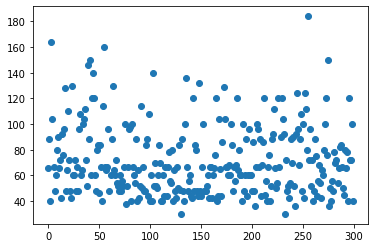

In [302]:
# смотрим как изменился график после замены на медиану. видим корректное отображение данных исходя 
# из описания датасета (отражает состояние сердца: 30-40 - нормально для взрослых
#          - редко бывает ниже нормы, хотя у спортивных лошадей может иметь показатель 20-25
#         - животные с болезненными поражениями или страдающие от шока кровообращения
#         -  может иметь повышенную частоту сердечных сокращений)
plt.scatter(x=range(len(df['пульс'])),y=df['пульс'])

In [271]:
print('мода: ',df['пульс'].round().mode()[0]) #  проверяем значение 1=мода
print('медиана: ',df['пульс'].median())
print('среднее: ',df['пульс'].mean())
print('СКО: ',df['пульс'].std())
print('Дисперсия: ',df['пульс'].var())
print('максимум: ',df['пульс'].max())
print('минимум: ',df['пульс'].min())
print('размах: ',df['пульс'].max()-df['пульс'].min())  
print('квантили: ',df['пульс'].quantile())
print('межквартильный размах: ',df['пульс'].quantile(0.75)-df['пульс'].quantile(0.25))
print('1-ый и 3-ий квантили: ',df['пульс'].quantile([0.25,0.75]))

мода:  66.0
медиана:  66.16
среднее:  71.45279999999998
СКО:  27.501943138889583
Дисперсия:  756.3568764147158
максимум:  184.0
минимум:  30.0
размах:  154.0
квантили:  66.16
межквартильный размах:  40.0
1-ый и 3-ий квантили:  0.25    48.0
0.75    88.0
Name: пульс, dtype: float64


In [376]:
print(len(df.loc[df['вздутие живота']=='?'])) # выбросы
print(len(df.loc[df['вздутие живота']=='1']))
print(len(df.loc[df['вздутие живота']=='2']))
print(len(df.loc[df['вздутие живота']=='3']))
print(len(df.loc[df['вздутие живота']=='4']))

56
76
65
65
38


In [377]:
# заменим пропуски на значение 0, затем выделим это в отдельную группу и будем анализировать в совокупности с другими
# заимозависимыми параметрами датасета
df['вздутие живота'].replace(['?'],[0],inplace=True)
df['вздутие живота'].unique()       

array(['4', '2', '1', 0, '3'], dtype=object)

In [378]:
df['вздутие живота']=pd.to_numeric(df['вздутие живота'])  

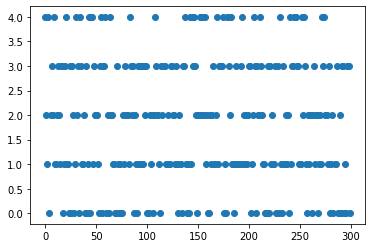

In [379]:
# рисуем точечный график, чтоб посмотреть наличие зависимостей и выбросов, а так же корректность выводов 
# по результатам проведенных рассчетов статистик 
plt.scatter(x=range(len(df['вздутие живота'])),y=df['вздутие живота'])

In [371]:
print('мода: ',df['вздутие живота'].round().mode()[0]) #  проверяем значение 1=мода
print('медиана: ',df['вздутие живота'].median())
print('среднее: ',df['вздутие живота'].mean())
print('СКО: ',df['вздутие живота'].std())
print('Дисперсия: ',df['вздутие живота'].var())
print('максимум: ',df['вздутие живота'].max())
print('минимум: ',df['вздутие живота'].min())
print('размах: ',df['вздутие живота'].max()-df['вздутие живота'].min())  
print('квантили: ',df['вздутие живота'].quantile())
print('межквартильный размах: ',df['вздутие живота'].quantile(0.75)-df['вздутие живота'].quantile(0.25))
print('1-ый и 3-ий квантили: ',df['вздутие живота'].quantile([0.25,0.75]))

array(['4', '2', '1', 'NaN', '3'], dtype=object)

In [88]:
df['общий белок'].replace(['?'],[0],inplace=True)
df['общий белок'].unique()    

array(['8.40', '85', '6.70', '7.20', '7.40', 0, '7.00', '8.30', '6.20',
       '6.00', '7.80', '6.10', '81', '6.80', '8.7', '70', '65', '5.50',
       '76', '7.50', '8.20', '6.60', '8.60', '80', '6.50', '8.50', '67',
       '69', '9.10', '7.70', '6.40', '8.10', '5.90', '8.00', '82', '72',
       '74', '6.30', '7.60', '4.90', '57', '68', '77', '8.90', '5.70',
       '4.50', '61', '86', '60', '66', '5.30', '7.30', '64', '58', '56',
       '75', '10.2', '62', '7.90', '73', '71', '7.0', '63', '46', '7.2',
       '5.80', '53', '4.70', '59', '55', '8.70', '89', '51', '4.00',
       '11.00', '8.80', '50', '54', '6.90', '4.60', '13', '7.10', '3.30',
       '9.00', '5.00'], dtype=object)

In [89]:
df['общий белок']=pd.to_numeric(df['общий белок'])  

In [91]:
df['результат'].replace(['?'],[0],inplace=True)
df['результат'].unique() 

array(['2', '3', '1', 0], dtype=object)

In [92]:
df['результат']=pd.to_numeric(df['результат'])  

In [93]:
df.info()  # проверяем что в столбцах записаны числовые типы данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   операция                300 non-null    int64  
 1   Возраст                 300 non-null    int64  
 2   Номер больницы          300 non-null    int64  
 3   ректальная температура  300 non-null    float64
 4   пульс                   300 non-null    int64  
 5   вздутие живота          300 non-null    int64  
 6   общий белок             300 non-null    float64
 7   результат               300 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 18.9 KB


In [37]:
print('ректальная температура:')
print('Матожидание: ',statistics.mean(df['ректальная температура']))
print('Максимум: ',max(df['ректальная температура']))
print('Минимум: ',min(df['ректальная температура']))
print('размах: ',max(df['ректальная температура'])-min(df['ректальная температура']))
print('стандартное отклонение: ',statistics.pstdev(df['ректальная температура']))
print('дисперсия: ',statistics.pvariance(df['ректальная температура']))
print('Медиана: ', statistics.median(df['ректальная температура']))
print('Значение моды: ', statistics.mode(df['ректальная температура']))

ректальная температура:


NameError: name 'statistics' is not defined

In [69]:
df['ректальная температура'].round().mode()[0]

38.0

In [75]:
df(df['ректальная температура']==38.0).value_counts().head()

TypeError: 'DataFrame' object is not callable

In [44]:
np.median(df['Возраст'])

1.0

In [45]:
df['Возраст'].round().mode()[0]

1

## Дополнительная часть (необязательная)

Выполнить задания 1-3 для всего набора данных.

#### ПРИМЕЧАНИЕ
Домашнее задание сдается ссылкой на репозиторий [GitHub](https://github.com/).
Не сможем проверить или помочь, если вы пришлете:
- файлы;
- архивы;
- скриншоты кода.

Все обсуждения и консультации по выполнению домашнего задания ведутся только на соответствующем канале в slack.

##### Как правильно задавать вопросы аспирантам, преподавателям и коллегам
Прежде чем задать вопрос, попробуйте найти ответ в интернете. Навык самостоятельного поиска информации — один из важнейших. Каждый практикующий специалист любого уровня делает это ежедневно.

Сформулируйте вопрос по алгоритму:  
1) Что я делаю?  
2) Какого результата я ожидаю?  
3) Как фактический результат отличается от ожидаемого?  
4) Что я уже попробовал сделать, чтобы исправить проблему?  

По возможности прикрепите к вопросу скриншоты либо ссылки на код. Не выкладывайте все решение, оставляйте только проблемный и воспроизводимый участок кода.